In [2]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [3]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
image_file = get_pkg_data_filename(r"/home/ambica/Desktop/Project/img3.fits")
f= fits.open(image_file)

In [4]:
fits.info(image_file)

Filename: /home/ambica/Desktop/Project/img3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    4325   (30720, 12800)   float32   


In [5]:
image_data=fits.getdata(image_file,ext=0)

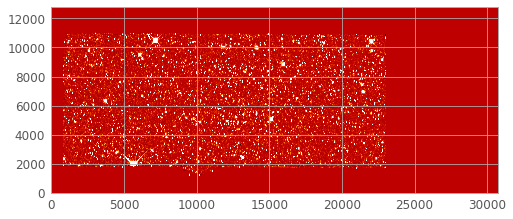

In [6]:
from astropy.visualization import ZScaleInterval
z=ZScaleInterval()
z1,z2=z.get_limits(image_data)
plt.figure()
plt.imshow(image_data,vmin=z1,vmax=z2, origin = 'lower')

In [3]:
from astropy.io import fits
hdulist = fits.open(r"/home/ambica/Desktop/Project/img3.fits")
header = hdulist[0].header
print(header.cards)

('SIMPLE', True, 'conforms to FITS standard')
('BITPIX', -32, 'array data type')
('NAXIS', 2, 'number of array dimensions')
('NAXIS1', 30720, '')
('NAXIS2', 12800, '')
('COMMENT', "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", '')
('COMMENT', "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", '')
('NEXTEND', 1, 'Number of standard extensions')
('FILENAME', 'uds-f160w-astrodrizzle-v4.0_drz_sci.fits', 'name of file')
('FILETYPE', 'SCI', 'type of data found in data file')
('', '', '')
('TELESCOP', 'HST', 'telescope used to acquire data')
('INSTRUME', 'WFC3', 'identifier for instrument used to acquire data')
('EQUINOX', 2000.0, 'equinox of celestial coord. system')
('', '', '')
('', '      / DATA DESCRIPTION KEYWORDS', '')
('', '', '')
('ROOTNAME', 'uds-f160w-astrodrizzle-v4.0', 'rootname of the observation set')
('IMAGETYP', 'EXT', 'type of exposure identifier')
('PRIMESI', 'WFC3', 'instrument designated as prime')
('', '', '')
('', '  

In [18]:
#from astropy import wcs
#w=WCS('img3.fits')
#x, y = w.wcs_world2pix(34.3651,-5.12197,0)
#print(x,y)


14458.64325671967 11081.22311981292


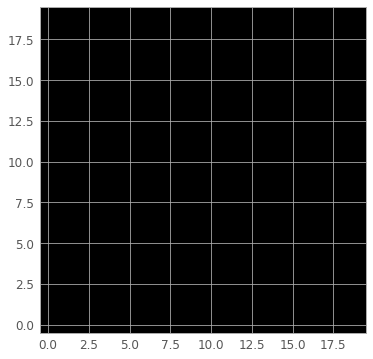

In [20]:
#from astropy.nddata import Cutout2D
#from astropy import units as u
#position = (14458.64325671967, 11081.22311981292)
#size = (20,20)
#cutout = Cutout2D(image_data,position,size)
#z1,z2=z.get_limits(cutout.data)
#plt.figure()
#plt.imshow(cutout.data, vmin = z1, vmax=z2, origin ='lower')

In [7]:
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy import units as u
import numpy as np
position = SkyCoord(34.3651,-5.12197, unit = "deg")
wcs = WCS(naxis=2)
wcs.wcs.crval=[position.ra.to_value(u.deg),position.dec.to_value(u.deg)]
cutout = Cutout2D(image_data,position,(20,20),wcs=wcs)
plt.imshow(cutout.data, origin = 'lower')
print(position)

ValueError: WCS should contain celestial component